In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
# Unique values in categorical variables
cat_col = data.select_dtypes(include=['object'])
cat_col.nunique()

Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

In [6]:
data['Location'].value_counts()

Canberra            3436
Sydney              3344
Melbourne           3193
Adelaide            3193
Perth               3193
Darwin              3193
Brisbane            3193
Hobart              3193
Albury              3040
Wollongong          3040
Ballarat            3040
Bendigo             3040
GoldCoast           3040
Launceston          3040
Albany              3040
AliceSprings        3040
MountGambier        3040
Cairns              3040
MountGinini         3040
Townsville          3040
Tuggeranong         3039
Penrith             3039
Newcastle           3039
Nuriootpa           3009
Richmond            3009
Dartmoor            3009
Portland            3009
Sale                3009
MelbourneAirport    3009
Mildura             3009
WaggaWagga          3009
Witchcliffe         3009
BadgerysCreek       3009
Cobar               3009
PearceRAAF          3009
Woomera             3009
CoffsHarbour        3009
NorfolkIsland       3009
Watsonia            3009
SydneyAirport       3009


In [7]:
cat_col.isna().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [8]:
data['Date'] = pd.to_datetime(data['Date'])
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data.drop('Date',axis=1,inplace=True)

In [9]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [10]:
data['Location'].value_counts()

Canberra            3436
Sydney              3344
Melbourne           3193
Adelaide            3193
Perth               3193
Darwin              3193
Brisbane            3193
Hobart              3193
Albury              3040
Wollongong          3040
Ballarat            3040
Bendigo             3040
GoldCoast           3040
Launceston          3040
Albany              3040
AliceSprings        3040
MountGambier        3040
Cairns              3040
MountGinini         3040
Townsville          3040
Tuggeranong         3039
Penrith             3039
Newcastle           3039
Nuriootpa           3009
Richmond            3009
Dartmoor            3009
Portland            3009
Sale                3009
MelbourneAirport    3009
Mildura             3009
WaggaWagga          3009
Witchcliffe         3009
BadgerysCreek       3009
Cobar               3009
PearceRAAF          3009
Woomera             3009
CoffsHarbour        3009
NorfolkIsland       3009
Watsonia            3009
SydneyAirport       3009


In [11]:
data['Location'].isna().sum()

0

In [12]:
# One Hot Encoding (Preview) for Location column
pd.get_dummies(data.Location, drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
data['WindGustDir'].value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

In [14]:
data['WindGustDir'].isna().sum()

10326

In [15]:
pd.get_dummies(data.WindGustDir,drop_first=True,dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [16]:
data['WindDir9am'].value_counts()

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

In [17]:
data['WindDir9am'].isna().sum()

10566

In [18]:
pd.get_dummies(data.WindDir9am,drop_first=True,dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
data['WindDir3pm'].value_counts()

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

In [20]:
data['WindDir3pm'].isna().sum()

4228

In [21]:
pd.get_dummies(data.WindDir3pm,drop_first=True,dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [22]:
data['RainToday'].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [23]:
data['RainToday'].isna().sum()

3261

In [24]:
pd.get_dummies(data.RainToday,drop_first=True,dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [25]:
#Continuous variable
var_data = data.select_dtypes(include=['float64'])
var_data.isna().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

In [26]:
var_data.describe().apply(round)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.0,144199.0,142199.0,82670.0,75625.0,135197.0,143693.0,142398.0,142806.0,140953.0,130395.0,130432.0,89572.0,86102.0,143693.0,141851.0
mean,12.0,23.0,2.0,5.0,8.0,40.0,14.0,19.0,69.0,52.0,1018.0,1015.0,4.0,5.0,17.0,22.0
std,6.0,7.0,8.0,4.0,4.0,14.0,9.0,9.0,19.0,21.0,7.0,7.0,3.0,3.0,6.0,7.0
min,-8.0,-5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,980.0,977.0,0.0,0.0,-7.0,-5.0
25%,8.0,18.0,0.0,3.0,5.0,31.0,7.0,13.0,57.0,37.0,1013.0,1010.0,1.0,2.0,12.0,17.0
50%,12.0,23.0,0.0,5.0,8.0,39.0,13.0,19.0,70.0,52.0,1018.0,1015.0,5.0,5.0,17.0,21.0
75%,17.0,28.0,1.0,7.0,11.0,48.0,19.0,24.0,83.0,66.0,1022.0,1020.0,7.0,7.0,22.0,26.0
max,34.0,48.0,371.0,145.0,14.0,135.0,130.0,87.0,100.0,100.0,1041.0,1040.0,9.0,9.0,40.0,47.0


Text(0.5, 1.0, 'Rainfall')

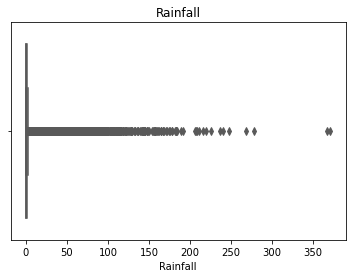

In [27]:
# Rainfall
sns.boxplot(x= 'Rainfall', data = data, palette = 'Set2')
plt.title("Rainfall")

<AxesSubplot:xlabel='Rainfall', ylabel='Count'>

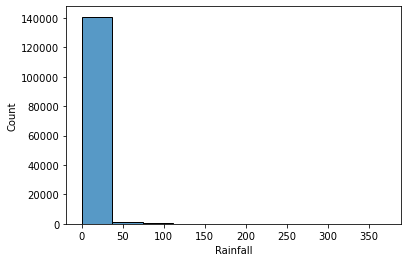

In [28]:
sns.histplot(x= 'Rainfall', data = data, palette = 'Set2', bins = 10)

Text(0.5, 1.0, 'Evaporation')

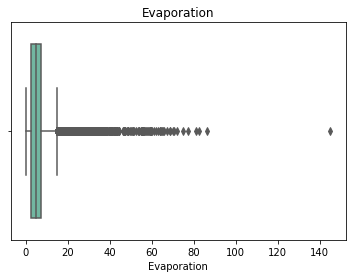

In [29]:
sns.boxplot(x=data['Evaporation'],palette='Set2')
plt.title("Evaporation")

<AxesSubplot:xlabel='Evaporation', ylabel='Count'>

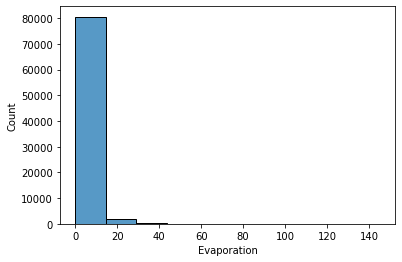

In [30]:
sns.histplot(x= 'Evaporation', data = data, palette = 'Set2', bins = 10)

Text(0.5, 1.0, 'Wind Direction at 9 AM')

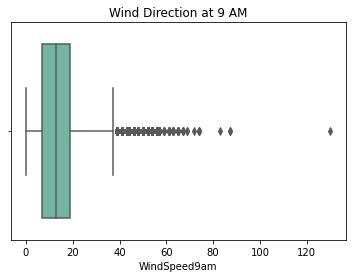

In [31]:
sns.boxplot(x= 'WindSpeed9am', data = data, palette = 'Set2')
plt.title("Wind Direction at 9 AM")

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Count'>

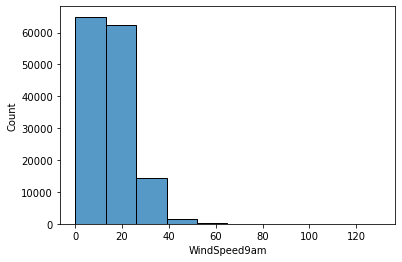

In [32]:
sns.histplot(x= 'WindSpeed9am', data = data, palette = 'Set2', bins = 10)

Text(0.5, 1.0, 'Wind Speed at 3 AM')

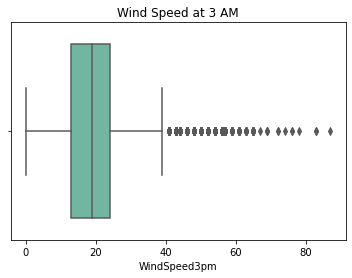

In [33]:
sns.boxplot(x= 'WindSpeed3pm', data = data, palette = 'Set2')
plt.title("Wind Speed at 3 AM")

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Count'>

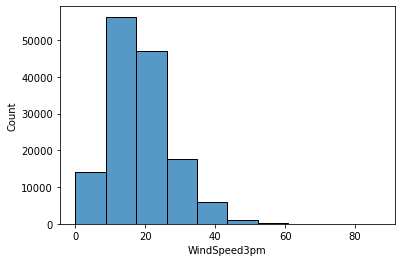

In [34]:
sns.histplot(x= 'WindSpeed3pm', data = data, palette = 'Set2', bins = 10)

In [35]:
# Calculating IQR, Upper and Lower bounds for all four columns

for column in ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']:
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    Lower_fence = data[column].quantile(0.25) - (IQR * 3)
    Upper_fence = data[column].quantile(0.75) + (IQR * 3)
    print(f'{column} outliers are values < {round(Lower_fence,2)} or > {round(Upper_fence,2)}')

Rainfall outliers are values < -2.4 or > 3.2
Evaporation outliers are values < -11.8 or > 21.8
WindSpeed9am outliers are values < -29.0 or > 55.0
WindSpeed3pm outliers are values < -20.0 or > 57.0


In [36]:
#removing missing data's
print(f"Number of missing values in response variable: {data['RainTomorrow'].isna().sum()}")

data = data.dropna(subset = ['RainTomorrow'])

print(f"Number of missing values in response variable after dropping NA values: {data['RainTomorrow'].isna().sum()}")

Number of missing values in response variable: 3267
Number of missing values in response variable after dropping NA values: 0


In [37]:
#SPlitting the dataset
X = data.drop(['RainTomorrow'],axis=1)
Y = data['RainTomorrow']

In [38]:
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,1024.7,1021.2,NaN,NaN,9.4,20.9,No,20,6,2017
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1024.6,1020.3,NaN,NaN,10.1,22.4,No,21,6,2017
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1023.5,1019.1,NaN,NaN,10.9,24.5,No,22,6,2017
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1021.0,1016.8,NaN,NaN,12.5,26.1,No,23,6,2017


In [39]:
Y

0         No
1         No
2         No
3         No
4         No
          ..
145454    No
145455    No
145456    No
145457    No
145458    No
Name: RainTomorrow, Length: 142193, dtype: object

In [40]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=0)

In [41]:
print(f"The training sets have the following shapes: {xtrain.shape, ytrain.shape}")
print(f"The testing sets have the following shapes: {xtest.shape, ytest.shape}")

The training sets have the following shapes: ((113754, 24), (113754,))
The testing sets have the following shapes: ((28439, 24), (28439,))


In [42]:
# Listing out categorical columns and their missing values
# This doesn't include 'Year', 'Month', and 'Day' because they're integers

categorical_cols = list(xtrain.select_dtypes(include=['object']).columns)
xtrain[categorical_cols].isna().sum()

Location          0
WindGustDir    7407
WindDir9am     7978
WindDir3pm     3008
RainToday      1139
dtype: int64

In [43]:
# Filling in missing values in X_train with the mode.
for i in categorical_cols:
    xtrain[i].fillna(xtrain[i].mode()[0], inplace=True)
    xtest[i].fillna(xtest[i].mode()[0], inplace=True)
    
# Checking missing values in X_train
xtrain[categorical_cols].isna().sum()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [44]:
xtest[categorical_cols].isna().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [58]:
!pip install category-encoders

In [45]:
# Encoding categorical variables
import category_encoders as ce

onehotencoder = ce.BinaryEncoder(cols=['RainToday'])
xtrain = onehotencoder.fit_transform(xtrain)
xtest = onehotencoder.fit_transform(xtest)

xtrain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Day,Month,Year
113462,Witchcliffe,13.9,22.6,0.2,NaN,NaN,S,41.0,SSE,S,...,1013.4,NaN,NaN,18.8,20.4,0,1,25,4,2014
89638,Cairns,22.4,29.4,2.0,6.0,6.3,ENE,33.0,SSE,SE,...,1013.1,7.0,5.0,26.4,27.5,1,0,2,11,2015
138130,AliceSprings,9.7,36.2,0.0,11.4,12.3,E,31.0,NE,N,...,1013.6,1.0,1.0,28.5,35.0,0,1,19,10,2014
87898,Cairns,20.5,30.1,0.0,8.8,11.1,ESE,37.0,SSE,E,...,1010.8,2.0,3.0,27.3,29.4,0,1,30,10,2010
16484,Newcastle,16.8,29.2,0.0,NaN,NaN,W,NaN,N,SE,...,NaN,5.0,8.0,22.2,27.0,0,1,8,11,2012


In [46]:
#Continuous_features
continuous_cols = list(xtrain.select_dtypes(include=['float64']).columns)
xtrain[continuous_cols].isna().sum()

MinTemp            495
MaxTemp            264
Rainfall          1139
Evaporation      48718
Sunshine         54314
WindGustSpeed     7367
WindSpeed9am      1086
WindSpeed3pm      2094
Humidity9am       1449
Humidity3pm       2890
Pressure9am      11212
Pressure3pm      11186
Cloud9am         43137
Cloud3pm         45768
Temp9am            740
Temp3pm           2171
dtype: int64

In [47]:
# Fill in missing values with median

for column in continuous_cols:
    xtrain[column].fillna(xtrain[column].median(), inplace = True)
    xtest[column].fillna(xtest[column].median(), inplace = True)
    
# Checking missing values 
xtrain.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday_0      0
RainToday_1      0
Day              0
Month            0
Year             0
dtype: int64

In [48]:
xtest.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday_0      0
RainToday_1      0
Day              0
Month            0
Year             0
dtype: int64

In [49]:
# Removing outliers in certain continous columns
def upper_outlier(df, variable, top):
    return np.where(df[variable]>top, top, df[variable])
def lower_outlier(df, variable, bot):
    return np.where(df[variable]<bot, bot, df[variable])

for X_df in [xtrain, xtest]:
    X_df['Rainfall'] = upper_outlier(X_df, 'Rainfall', 3.2)
    X_df['Rainfall'] = lower_outlier(X_df, 'Rainfall', -2.4)
    
    X_df['Evaporation'] = upper_outlier(X_df, 'Evaporation', 21.8)
    X_df['Evaporation'] = lower_outlier(X_df, 'Evaporation', -11.8)

    X_df['WindSpeed9am'] = upper_outlier(X_df, 'WindSpeed9am', 55.0)
    X_df['WindSpeed9am'] = lower_outlier(X_df, 'WindSpeed9am', -29.0)

    X_df['WindSpeed3pm'] = upper_outlier(X_df, 'WindSpeed3pm', 57.0)
    X_df['WindSpeed3pm'] = lower_outlier(X_df, 'WindSpeed3pm', -20.0)

xtrain.describe().apply(round)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Day,Month,Year
count,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,...,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0,113754.0
mean,12.0,23.0,1.0,5.0,8.0,40.0,14.0,19.0,69.0,52.0,...,1015.0,5.0,5.0,17.0,22.0,0.0,1.0,16.0,6.0,2013.0
std,6.0,7.0,1.0,3.0,3.0,13.0,9.0,9.0,19.0,21.0,...,7.0,2.0,2.0,6.0,7.0,0.0,0.0,9.0,3.0,3.0
min,-8.0,-5.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,...,977.0,0.0,0.0,-7.0,-5.0,0.0,0.0,1.0,1.0,2007.0
25%,8.0,18.0,0.0,4.0,8.0,31.0,7.0,13.0,57.0,37.0,...,1011.0,3.0,4.0,12.0,17.0,0.0,1.0,8.0,3.0,2011.0
50%,12.0,23.0,0.0,5.0,8.0,39.0,13.0,19.0,70.0,52.0,...,1015.0,5.0,5.0,17.0,21.0,0.0,1.0,16.0,6.0,2013.0
75%,17.0,28.0,1.0,5.0,9.0,46.0,19.0,24.0,83.0,65.0,...,1019.0,6.0,6.0,22.0,26.0,0.0,1.0,23.0,9.0,2015.0
max,34.0,48.0,3.0,22.0,14.0,135.0,55.0,57.0,100.0,100.0,...,1040.0,9.0,8.0,40.0,47.0,1.0,1.0,31.0,12.0,2017.0


In [50]:
# Include the other columns that are to be encoded (outlined above)

xtrain = pd.concat([xtrain[continuous_cols], xtrain[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(xtrain.Location), 
                     pd.get_dummies(xtrain.WindGustDir, prefix = 'WGD'),
                     pd.get_dummies(xtrain.WindDir9am, prefix = 'WD9am'),
                     pd.get_dummies(xtrain.WindDir3pm, prefix = 'WD3pm')], axis=1)

xtest = pd.concat([xtest[continuous_cols], xtest[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(xtest.Location), 
                     pd.get_dummies(xtest.WindGustDir, prefix = 'WGD'),
                     pd.get_dummies(xtest.WindDir9am, prefix = 'WD9am'),
                     pd.get_dummies(xtest.WindDir3pm, prefix = 'WD3pm')], axis=1)

In [51]:
ytest.isna().sum()

0

In [52]:
ytrain.isna().sum()

0

In [53]:
xtrain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WD3pm_NNW,WD3pm_NW,WD3pm_S,WD3pm_SE,WD3pm_SSE,WD3pm_SSW,WD3pm_SW,WD3pm_W,WD3pm_WNW,WD3pm_WSW
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.675080,5.151606,8.041154,39.884074,13.978155,18.614756,68.867486,51.509547,...,0.054530,0.060288,0.067259,0.101605,0.064059,0.056402,0.064464,0.069334,0.060798,0.065483
std,6.388279,7.094149,1.183837,2.823707,2.769480,13.116959,8.806558,8.685862,18.935587,20.530723,...,0.227061,0.238021,0.250471,0.302130,0.244860,0.230698,0.245578,0.254022,0.238960,0.247378
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
# Scaling using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

cols = list(xtrain.columns)

scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtrain = pd.DataFrame(xtrain, columns=[cols])

xtest = scaler.transform(xtest)
xtest = pd.DataFrame(xtest, columns=[cols])

xtrain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WD3pm_NNW,WD3pm_NW,WD3pm_S,WD3pm_SE,WD3pm_SSE,WD3pm_SSW,WD3pm_SW,WD3pm_W,WD3pm_WNW,WD3pm_WSW
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,0.484406,0.530004,0.210962,0.236312,0.554562,0.262667,0.254148,0.326575,0.688675,0.515095,...,0.054530,0.060288,0.067259,0.101605,0.064059,0.056402,0.064464,0.069334,0.060798,0.065483
std,0.151741,0.134105,0.369949,0.129528,0.190999,0.101682,0.160119,0.152384,0.189356,0.205307,...,0.227061,0.238021,0.250471,0.302130,0.244860,0.230698,0.245578,0.254022,0.238960,0.247378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375297,0.431002,0.000000,0.183486,0.565517,0.193798,0.127273,0.228070,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.479810,0.517958,0.000000,0.220183,0.586207,0.255814,0.236364,0.333333,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.593824,0.623819,0.187500,0.247706,0.600000,0.310078,0.345455,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
xtrain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WD3pm_NNW,WD3pm_NW,WD3pm_S,WD3pm_SE,WD3pm_SSE,WD3pm_SSW,WD3pm_SW,WD3pm_W,WD3pm_WNW,WD3pm_WSW
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,0.484406,0.530004,0.210962,0.236312,0.554562,0.262667,0.254148,0.326575,0.688675,0.515095,...,0.054530,0.060288,0.067259,0.101605,0.064059,0.056402,0.064464,0.069334,0.060798,0.065483
std,0.151741,0.134105,0.369949,0.129528,0.190999,0.101682,0.160119,0.152384,0.189356,0.205307,...,0.227061,0.238021,0.250471,0.302130,0.244860,0.230698,0.245578,0.254022,0.238960,0.247378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375297,0.431002,0.000000,0.183486,0.565517,0.193798,0.127273,0.228070,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.479810,0.517958,0.000000,0.220183,0.586207,0.255814,0.236364,0.333333,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.593824,0.623819,0.187500,0.247706,0.600000,0.310078,0.345455,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initiatlize the model
logreg = LogisticRegression(solver='liblinear', random_state = 0)

# Fit the model
logreg.fit(xtrain, ytrain)

# Predict data points 
y_pred_test = logreg.predict(xtest)

# Print accuracy scores
print(f'Model accuracy score: {round(accuracy_score(ytest, y_pred_test) * 100, 2)}%')

Model accuracy score: 84.99%


In [57]:
import pickle
filename = 'rainfall_LR_model.pkl'
pickle.dump(logreg, open(filename, 'wb'))

In [58]:
from sklearn.tree import DecisionTreeClassifier
DTR = DecisionTreeClassifier()
DTR.fit(xtrain,ytrain)
dtr_pred = DTR.predict(xtest)
# Print accuracy scores
print(f'Model accuracy score: {round(accuracy_score(ytest, dtr_pred) * 100, 2)}%')

Model accuracy score: 79.3%


In [59]:
filename = 'rainfall_DTR_model.pkl'
pickle.dump(DTR, open(filename, 'wb'))

In [60]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [61]:
RFC_pred = classifier.predict(xtest)
print(f'Model accuracy score: {round(accuracy_score(ytest,RFC_pred) * 100, 2)}%')

Model accuracy score: 84.85%


In [67]:
filename = 'rainfall_RFC_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
knn_pred = knn.predict(xtest)
print(f'Model accuracy score: {round(accuracy_score(ytest,knn_pred) * 100, 2)}%')

Model accuracy score: 80.14%


In [66]:
filename = 'rainfall_KNN_model.pkl'
pickle.dump(knn, open(filename, 'wb'))

In [65]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(xtrain, ytrain)
GNB_pred = GNB.predict(xtest)
print(f'Model accuracy score: {round(accuracy_score(ytest,GNB_pred) * 100, 2)}%')

Model accuracy score: 65.13%


In [68]:
filename = 'rainfall_GNB_model.pkl'
pickle.dump(GNB, open(filename, 'wb'))

In [70]:
!pip install catboost

In [71]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat.fit(xtrain, ytrain)

Learning rate set to 0.04119
0:	total: 186ms	remaining: 6m 12s
1:	total: 218ms	remaining: 3m 38s
2:	total: 249ms	remaining: 2m 45s
3:	total: 279ms	remaining: 2m 19s
4:	total: 305ms	remaining: 2m 1s
5:	total: 334ms	remaining: 1m 51s
6:	total: 358ms	remaining: 1m 41s
7:	total: 384ms	remaining: 1m 35s
8:	total: 411ms	remaining: 1m 30s
9:	total: 440ms	remaining: 1m 27s
10:	total: 465ms	remaining: 1m 24s
11:	total: 489ms	remaining: 1m 21s
12:	total: 514ms	remaining: 1m 18s
13:	total: 540ms	remaining: 1m 16s
14:	total: 565ms	remaining: 1m 14s
15:	total: 592ms	remaining: 1m 13s
16:	total: 622ms	remaining: 1m 12s
17:	total: 649ms	remaining: 1m 11s
18:	total: 675ms	remaining: 1m 10s
19:	total: 701ms	remaining: 1m 9s
20:	total: 727ms	remaining: 1m 8s
21:	total: 753ms	remaining: 1m 7s
22:	total: 779ms	remaining: 1m 6s
23:	total: 805ms	remaining: 1m 6s
24:	total: 836ms	remaining: 1m 6s
25:	total: 862ms	remaining: 1m 5s
26:	total: 888ms	remaining: 1m 4s
27:	total: 913ms	remaining: 1m 4s
28:	total: 

239:	total: 5.22s	remaining: 38.3s
240:	total: 5.24s	remaining: 38.3s
241:	total: 5.26s	remaining: 38.2s
242:	total: 5.28s	remaining: 38.2s
243:	total: 5.3s	remaining: 38.1s
244:	total: 5.32s	remaining: 38.1s
245:	total: 5.34s	remaining: 38.1s
246:	total: 5.36s	remaining: 38.1s
247:	total: 5.38s	remaining: 38s
248:	total: 5.4s	remaining: 38s
249:	total: 5.42s	remaining: 38s
250:	total: 5.44s	remaining: 37.9s
251:	total: 5.46s	remaining: 37.9s
252:	total: 5.48s	remaining: 37.9s
253:	total: 5.5s	remaining: 37.8s
254:	total: 5.52s	remaining: 37.8s
255:	total: 5.54s	remaining: 37.8s
256:	total: 5.56s	remaining: 37.7s
257:	total: 5.58s	remaining: 37.7s
258:	total: 5.6s	remaining: 37.6s
259:	total: 5.62s	remaining: 37.6s
260:	total: 5.64s	remaining: 37.6s
261:	total: 5.66s	remaining: 37.6s
262:	total: 5.68s	remaining: 37.5s
263:	total: 5.71s	remaining: 37.5s
264:	total: 5.73s	remaining: 37.5s
265:	total: 5.75s	remaining: 37.5s
266:	total: 5.77s	remaining: 37.5s
267:	total: 5.79s	remaining: 3

484:	total: 10.1s	remaining: 31.5s
485:	total: 10.1s	remaining: 31.4s
486:	total: 10.1s	remaining: 31.4s
487:	total: 10.1s	remaining: 31.4s
488:	total: 10.1s	remaining: 31.3s
489:	total: 10.1s	remaining: 31.3s
490:	total: 10.2s	remaining: 31.2s
491:	total: 10.2s	remaining: 31.2s
492:	total: 10.2s	remaining: 31.1s
493:	total: 10.2s	remaining: 31.1s
494:	total: 10.2s	remaining: 31.1s
495:	total: 10.2s	remaining: 31s
496:	total: 10.2s	remaining: 31s
497:	total: 10.3s	remaining: 30.9s
498:	total: 10.3s	remaining: 30.9s
499:	total: 10.3s	remaining: 30.9s
500:	total: 10.3s	remaining: 30.8s
501:	total: 10.3s	remaining: 30.8s
502:	total: 10.3s	remaining: 30.8s
503:	total: 10.4s	remaining: 30.7s
504:	total: 10.4s	remaining: 30.7s
505:	total: 10.4s	remaining: 30.7s
506:	total: 10.4s	remaining: 30.6s
507:	total: 10.4s	remaining: 30.6s
508:	total: 10.4s	remaining: 30.5s
509:	total: 10.4s	remaining: 30.5s
510:	total: 10.5s	remaining: 30.5s
511:	total: 10.5s	remaining: 30.4s
512:	total: 10.5s	remain

722:	total: 13.5s	remaining: 23.8s
723:	total: 13.5s	remaining: 23.7s
724:	total: 13.5s	remaining: 23.7s
725:	total: 13.5s	remaining: 23.7s
726:	total: 13.5s	remaining: 23.7s
727:	total: 13.5s	remaining: 23.6s
728:	total: 13.5s	remaining: 23.6s
729:	total: 13.6s	remaining: 23.6s
730:	total: 13.6s	remaining: 23.6s
731:	total: 13.6s	remaining: 23.5s
732:	total: 13.6s	remaining: 23.5s
733:	total: 13.6s	remaining: 23.5s
734:	total: 13.6s	remaining: 23.4s
735:	total: 13.6s	remaining: 23.4s
736:	total: 13.7s	remaining: 23.4s
737:	total: 13.7s	remaining: 23.4s
738:	total: 13.7s	remaining: 23.3s
739:	total: 13.7s	remaining: 23.3s
740:	total: 13.7s	remaining: 23.3s
741:	total: 13.7s	remaining: 23.3s
742:	total: 13.7s	remaining: 23.2s
743:	total: 13.8s	remaining: 23.2s
744:	total: 13.8s	remaining: 23.2s
745:	total: 13.8s	remaining: 23.2s
746:	total: 13.8s	remaining: 23.1s
747:	total: 13.8s	remaining: 23.1s
748:	total: 13.8s	remaining: 23.1s
749:	total: 13.8s	remaining: 23.1s
750:	total: 13.9s	re

959:	total: 16.9s	remaining: 18.3s
960:	total: 16.9s	remaining: 18.2s
961:	total: 16.9s	remaining: 18.2s
962:	total: 16.9s	remaining: 18.2s
963:	total: 16.9s	remaining: 18.2s
964:	total: 16.9s	remaining: 18.2s
965:	total: 17s	remaining: 18.1s
966:	total: 17s	remaining: 18.1s
967:	total: 17s	remaining: 18.1s
968:	total: 17s	remaining: 18.1s
969:	total: 17s	remaining: 18.1s
970:	total: 17s	remaining: 18s
971:	total: 17s	remaining: 18s
972:	total: 17.1s	remaining: 18s
973:	total: 17.1s	remaining: 18s
974:	total: 17.1s	remaining: 18s
975:	total: 17.1s	remaining: 17.9s
976:	total: 17.1s	remaining: 17.9s
977:	total: 17.1s	remaining: 17.9s
978:	total: 17.1s	remaining: 17.9s
979:	total: 17.2s	remaining: 17.9s
980:	total: 17.2s	remaining: 17.8s
981:	total: 17.2s	remaining: 17.8s
982:	total: 17.2s	remaining: 17.8s
983:	total: 17.2s	remaining: 17.8s
984:	total: 17.2s	remaining: 17.7s
985:	total: 17.2s	remaining: 17.7s
986:	total: 17.2s	remaining: 17.7s
987:	total: 17.3s	remaining: 17.7s
988:	tota

1201:	total: 20.4s	remaining: 13.6s
1202:	total: 20.5s	remaining: 13.6s
1203:	total: 20.5s	remaining: 13.5s
1204:	total: 20.5s	remaining: 13.5s
1205:	total: 20.5s	remaining: 13.5s
1206:	total: 20.5s	remaining: 13.5s
1207:	total: 20.5s	remaining: 13.5s
1208:	total: 20.5s	remaining: 13.4s
1209:	total: 20.6s	remaining: 13.4s
1210:	total: 20.6s	remaining: 13.4s
1211:	total: 20.6s	remaining: 13.4s
1212:	total: 20.6s	remaining: 13.4s
1213:	total: 20.6s	remaining: 13.4s
1214:	total: 20.6s	remaining: 13.3s
1215:	total: 20.7s	remaining: 13.3s
1216:	total: 20.7s	remaining: 13.3s
1217:	total: 20.7s	remaining: 13.3s
1218:	total: 20.7s	remaining: 13.3s
1219:	total: 20.7s	remaining: 13.2s
1220:	total: 20.7s	remaining: 13.2s
1221:	total: 20.7s	remaining: 13.2s
1222:	total: 20.8s	remaining: 13.2s
1223:	total: 20.8s	remaining: 13.2s
1224:	total: 20.8s	remaining: 13.1s
1225:	total: 20.8s	remaining: 13.1s
1226:	total: 20.8s	remaining: 13.1s
1227:	total: 20.8s	remaining: 13.1s
1228:	total: 20.8s	remaining

1436:	total: 24.1s	remaining: 9.43s
1437:	total: 24.1s	remaining: 9.41s
1438:	total: 24.1s	remaining: 9.39s
1439:	total: 24.1s	remaining: 9.38s
1440:	total: 24.1s	remaining: 9.36s
1441:	total: 24.1s	remaining: 9.34s
1442:	total: 24.2s	remaining: 9.33s
1443:	total: 24.2s	remaining: 9.31s
1444:	total: 24.2s	remaining: 9.29s
1445:	total: 24.2s	remaining: 9.28s
1446:	total: 24.2s	remaining: 9.26s
1447:	total: 24.2s	remaining: 9.24s
1448:	total: 24.3s	remaining: 9.22s
1449:	total: 24.3s	remaining: 9.21s
1450:	total: 24.3s	remaining: 9.19s
1451:	total: 24.3s	remaining: 9.17s
1452:	total: 24.3s	remaining: 9.15s
1453:	total: 24.3s	remaining: 9.14s
1454:	total: 24.3s	remaining: 9.12s
1455:	total: 24.4s	remaining: 9.1s
1456:	total: 24.4s	remaining: 9.09s
1457:	total: 24.4s	remaining: 9.07s
1458:	total: 24.4s	remaining: 9.05s
1459:	total: 24.4s	remaining: 9.03s
1460:	total: 24.4s	remaining: 9.02s
1461:	total: 24.5s	remaining: 9s
1462:	total: 24.5s	remaining: 8.98s
1463:	total: 24.5s	remaining: 8.

1676:	total: 27.7s	remaining: 5.33s
1677:	total: 27.7s	remaining: 5.31s
1678:	total: 27.7s	remaining: 5.29s
1679:	total: 27.7s	remaining: 5.28s
1680:	total: 27.7s	remaining: 5.26s
1681:	total: 27.7s	remaining: 5.24s
1682:	total: 27.8s	remaining: 5.23s
1683:	total: 27.8s	remaining: 5.21s
1684:	total: 27.8s	remaining: 5.19s
1685:	total: 27.8s	remaining: 5.18s
1686:	total: 27.8s	remaining: 5.16s
1687:	total: 27.8s	remaining: 5.14s
1688:	total: 27.8s	remaining: 5.13s
1689:	total: 27.9s	remaining: 5.11s
1690:	total: 27.9s	remaining: 5.09s
1691:	total: 27.9s	remaining: 5.08s
1692:	total: 27.9s	remaining: 5.06s
1693:	total: 27.9s	remaining: 5.04s
1694:	total: 27.9s	remaining: 5.02s
1695:	total: 27.9s	remaining: 5.01s
1696:	total: 28s	remaining: 4.99s
1697:	total: 28s	remaining: 4.97s
1698:	total: 28s	remaining: 4.96s
1699:	total: 28s	remaining: 4.94s
1700:	total: 28s	remaining: 4.92s
1701:	total: 28s	remaining: 4.91s
1702:	total: 28s	remaining: 4.89s
1703:	total: 28s	remaining: 4.87s
1704:	to

1914:	total: 31.2s	remaining: 1.38s
1915:	total: 31.2s	remaining: 1.37s
1916:	total: 31.2s	remaining: 1.35s
1917:	total: 31.2s	remaining: 1.33s
1918:	total: 31.3s	remaining: 1.32s
1919:	total: 31.3s	remaining: 1.3s
1920:	total: 31.3s	remaining: 1.29s
1921:	total: 31.3s	remaining: 1.27s
1922:	total: 31.3s	remaining: 1.25s
1923:	total: 31.3s	remaining: 1.24s
1924:	total: 31.3s	remaining: 1.22s
1925:	total: 31.4s	remaining: 1.2s
1926:	total: 31.4s	remaining: 1.19s
1927:	total: 31.4s	remaining: 1.17s
1928:	total: 31.4s	remaining: 1.16s
1929:	total: 31.4s	remaining: 1.14s
1930:	total: 31.4s	remaining: 1.12s
1931:	total: 31.5s	remaining: 1.11s
1932:	total: 31.5s	remaining: 1.09s
1933:	total: 31.5s	remaining: 1.07s
1934:	total: 31.5s	remaining: 1.06s
1935:	total: 31.5s	remaining: 1.04s
1936:	total: 31.5s	remaining: 1.02s
1937:	total: 31.5s	remaining: 1.01s
1938:	total: 31.6s	remaining: 993ms
1939:	total: 31.6s	remaining: 976ms
1940:	total: 31.6s	remaining: 960ms
1941:	total: 31.6s	remaining: 

In [72]:
cat_pred = cat.predict(xtest)
print(f'Model accuracy score: {round(accuracy_score(ytest,cat_pred) * 100, 2)}%')

Model accuracy score: 86.68%


In [73]:
filename = 'rainfall_cat_model.pkl'
pickle.dump(cat, open(filename, 'wb'))